In [25]:
import sympy
sympy.init_printing()

In [26]:
# DH 파라미터를 이용해 Homogeneous Transformation Matrix 만드는 함수
def DH(a, alpha, d, theta):
    T_rot_x = sympy.Matrix([[1,0,0,0],
                            [0,sympy.cos(alpha),-sympy.sin(alpha),0],
                            [0,sympy.sin(alpha),sympy.cos(alpha),0],
                            [0,0,0,1]]);
    T_trans_x = sympy.Matrix([[1,0,0,a],
                              [0,1,0,0],
                              [0,0,1,0],
                              [0,0,0,1]]);
    T_trans_z = sympy.Matrix([[1,0,0,0],
                              [0,1,0,0],
                              [0,0,1,d],
                              [0,0,0,1]]);
    T_rot_z = sympy.Matrix([[sympy.cos(theta),-sympy.sin(theta),0,0],
                            [sympy.sin(theta),sympy.cos(theta),0,0],
                            [0,0,1,0],
                            [0,0,0,1]]);
    T = T_rot_x*T_trans_x*T_trans_z*T_rot_z;
    return T

# 동차변환에서 회전행렬만 뽑아내는 함수
def get_R_from_T(T):
    R = T[0:3,0:3];
    return R

# 속도전파식을 이용하여 관절의 각속도를 구하는 함수
def get_angular_vel_R(T_i_ip1,w_i,thd_ip1):
    R_i_ip1 = get_R_from_T(T_i_ip1);
    R_ip1_i = sympy.transpose(R_i_ip1);
    Z_ip1_ip1 = sympy.Matrix([[0],[0],[1]]);
    w_ip1_ip1 = R_ip1_i@w_i + thd_ip1*Z_ip1_ip1;
    return w_ip1_ip1    

# 속도전파식을 이용하여 관절의 선속도를 구하는 함수
def get_linear_vel_R(T_i_ip1,w_i,v_i):
    R_i_ip1 = get_R_from_T(T_i_ip1);
    R_ip1_i = sympy.transpose(R_i_ip1);
    r_i_ip1 = T_i_ip1[0:3,3:4];
    v_ip1_ip1 = R_ip1_i@(v_i + w_i.cross(r_i_ip1));
    return v_ip1_ip1

# 선속도와 각속도를 입력으로 받아 자코비안을 구하는 함수
def get_Jacobian(v_0_n,w_0_n,q):
    J = sympy.zeros(6,len(q));
    i = 0;
    for q_i in q:
        j_i = [];
        j_i.append(sympy.simplify(sympy.diff(v_0_n,q_i)));
        j_i.append(sympy.simplify(sympy.diff(w_0_n,q_i)));
        J[:,i] = sympy.Matrix(j_i);
        i+=1;
    return J


#변환행렬
def rotX(alpha):
    T = sympy.Matrix([[1,0,0,0],
                      [0,sympy.cos(alpha),-sympy.sin(alpha),0],
                      [0,sympy.sin(alpha),sympy.cos(alpha),0],
                      [0,0,0,1]]);
    return T

def rotY(alpha):
    T = sympy.Matrix([[sympy.cos(alpha),0,sympy.sin(alpha),0],
                      [0,1,0,0],
                      [-sympy.sin(alpha),0,sympy.cos(alpha),0],
                      [0,0,0,1]]);
    return T

def rotZ(alpha):
    T = sympy.Matrix([[sympy.cos(alpha),-sympy.sin(alpha),0,0],
                      [sympy.sin(alpha),sympy.cos(alpha),0,0],
                      [0,0,1,0],
                      [0,0,0,1]]);
    return T


#Trans
def trans(a,b,c):
    T = sympy.Matrix([[1,0,0,a],
                      [0,1,0,b],
                      [0,0,1,c],
                      [0,0,0,1]]);
    return T

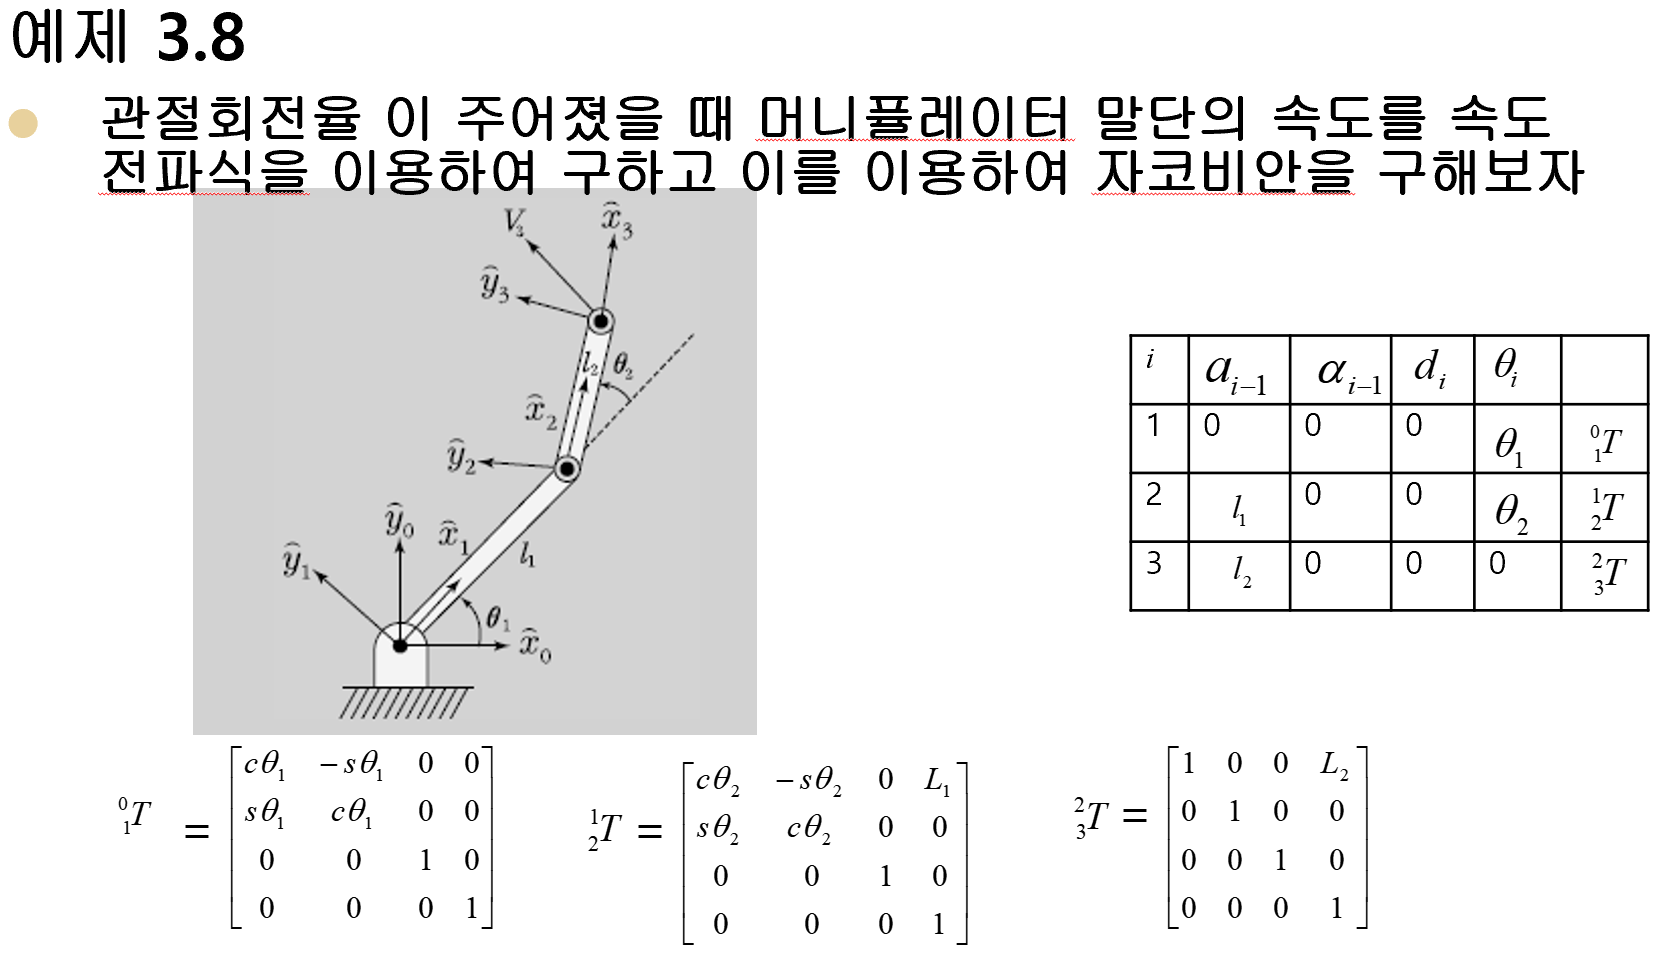

In [27]:
from IPython.display import Image
Image('ex3-Copy1.8_fig.PNG', width=600)

In [28]:
l1,l2,th1,th2,th1d,th2d,th3 = sympy.symbols('l1,l2,th1,th2,th1d,th2d, th3')

In [29]:
T01 = DH(0,0,0,th1)
T12 = DH(l1,0,0,th2)
T23 = DH(l2,0,0,th3)
T03 = T01*T12*T23

In [30]:
w00 = sympy.Matrix([[0],[0],[0]])
v00 = sympy.Matrix([[0],[0],[0]])

In [31]:
w11 = get_angular_vel_R(T01,w00,th1d)
v11 = get_linear_vel_R(T01,w00,v00)

In [32]:
w22 = get_angular_vel_R(T12,w11,th2d)
v22 = get_linear_vel_R(T12,w11,v11)

In [33]:
w33 = get_angular_vel_R(T23,w22,0)
v33 = get_linear_vel_R(T23,w22,v22)

In [34]:
w03 = get_R_from_T(T03) * w33
v03 = get_R_from_T(T03) * v33

In [35]:
q = sympy.Matrix([[th1d],[th2d]]) 

In [36]:
get_Jacobian(v03,w03,q)

⎡-l₁⋅sin(th₁) - l₂⋅sin(th₁ + th₂)  -l₂⋅sin(th₁ + th₂)⎤
⎢                                                    ⎥
⎢l₁⋅cos(th₁) + l₂⋅cos(th₁ + th₂)   l₂⋅cos(th₁ + th₂) ⎥
⎢                                                    ⎥
⎢               0                          0         ⎥
⎢                                                    ⎥
⎢               0                          0         ⎥
⎢                                                    ⎥
⎢               0                          0         ⎥
⎢                                                    ⎥
⎣               1                          1         ⎦

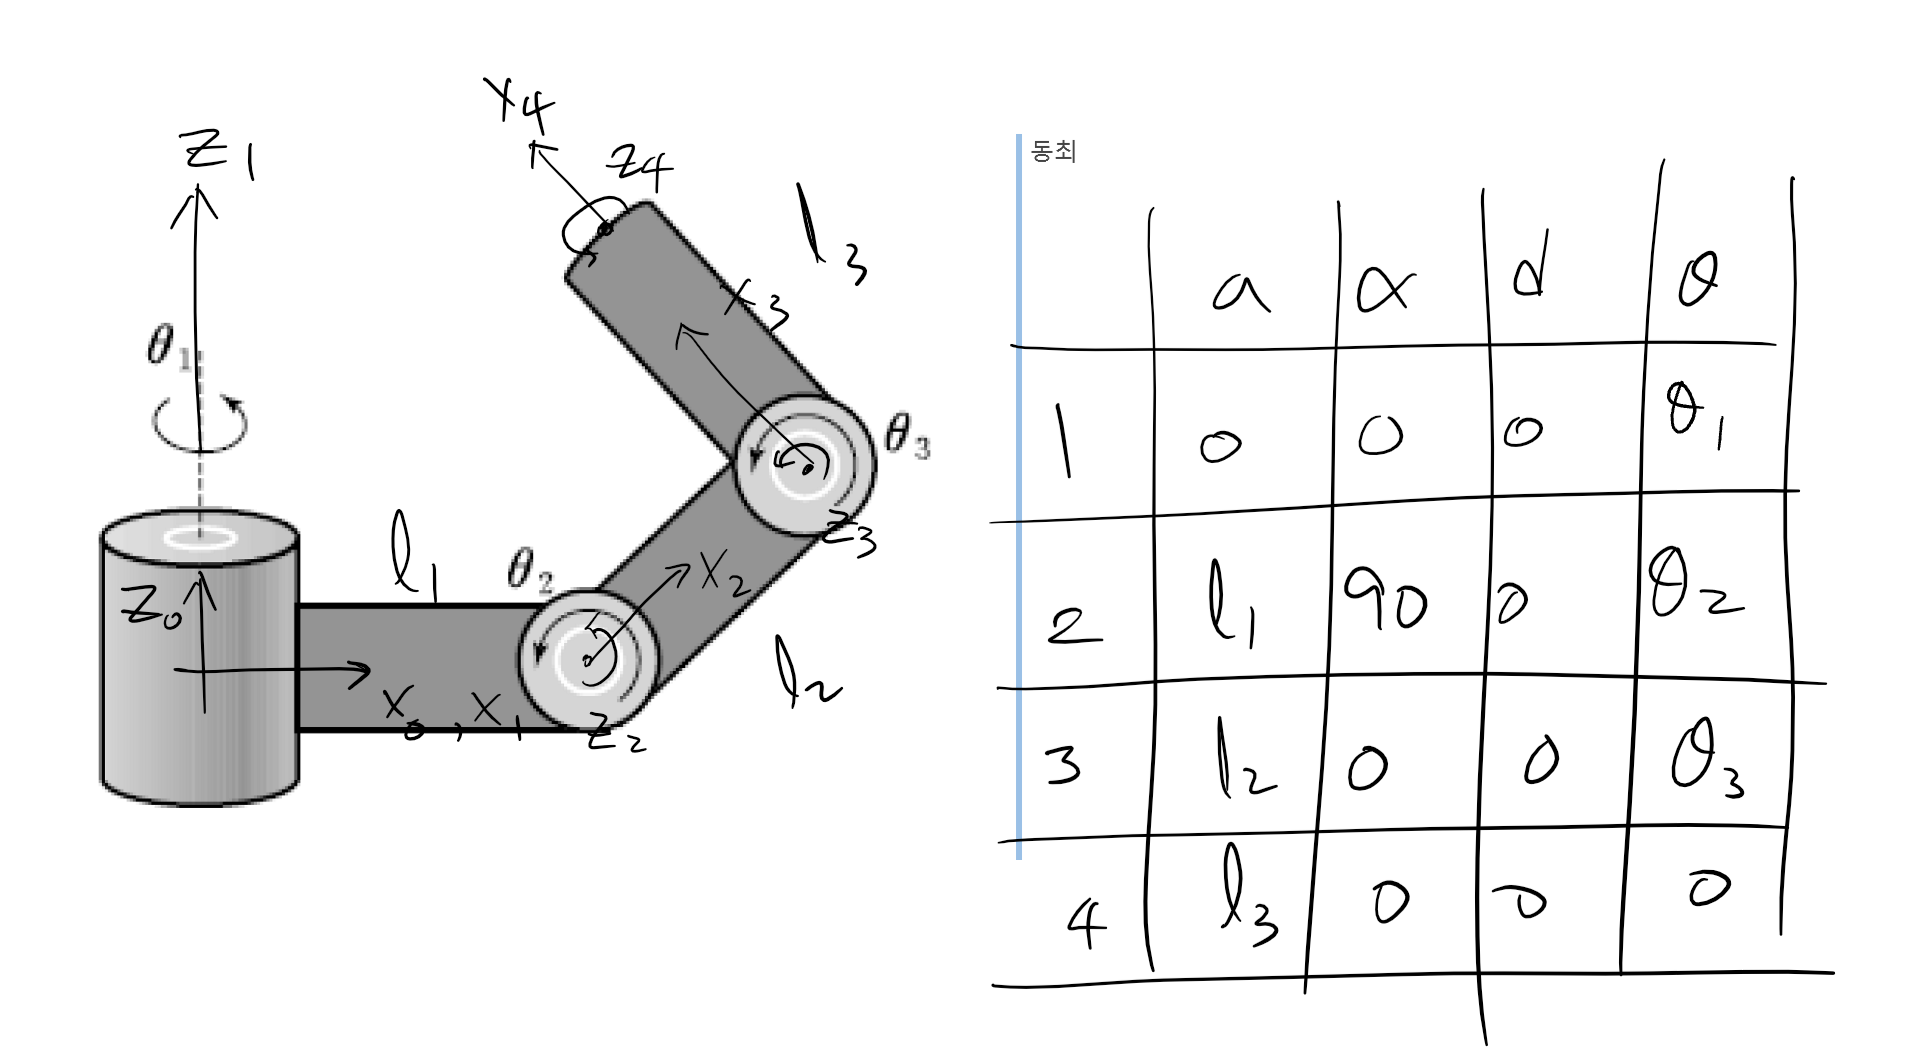

In [37]:
from IPython.display import Image
Image('practice_3-Copy1.11_fig.PNG', width=600)

In [38]:
l1,l2,l3,th1,th2,th3,th1d,th2d,th3d = sympy.symbols('l1,l2,l3,th1,th2,th3,th1d,th2d,th3d')

In [39]:
T01 = DH(0,0,0,th1)
T12 = DH(l1,sympy.pi/2,0,th2)
T23 = DH(l2,0,0,th3)
T34 = DH(l3,0,0,0)

T04 = T01*T12*T23*T34

In [40]:
w00 = sympy.Matrix([[0],[0],[0]])
v00 = sympy.Matrix([[0],[0],[0]])
q = sympy.Matrix([[th1d],[th2d],[th3d]])

w11 = get_angular_vel_R(T01,w00,th1d)
v11 = get_linear_vel_R(T01,w00,v00)

w22 = get_angular_vel_R(T12,w11,th2d)
v22 = get_linear_vel_R(T12,w11,v11)

w33 = get_angular_vel_R(T23,w22,th3d)
v33 = get_linear_vel_R(T23,w22,v22)

w44 = get_angular_vel_R(T34,w33,0)
v44 = get_linear_vel_R(T34,w33,v33)

In [41]:
w04 = get_R_from_T(T04)*w44
v04 = get_R_from_T(T04)*v44

In [42]:
get_Jacobian(v04,w04,q)

⎡-(l₁ + l₂⋅cos(th₂) + l₃⋅cos(th₂ + th₃))⋅sin(th₁)  -(l₂⋅sin(th₂) + l₃⋅sin(th₂ 
⎢                                                                             
⎢(l₁ + l₂⋅cos(th₂) + l₃⋅cos(th₂ + th₃))⋅cos(th₁)   -(l₂⋅sin(th₂) + l₃⋅sin(th₂ 
⎢                                                                             
⎢                       0                                l₂⋅cos(th₂) + l₃⋅cos(
⎢                                                                             
⎢                       0                                           sin(th₁)  
⎢                                                                             
⎢                       0                                           -cos(th₁) 
⎢                                                                             
⎣                       1                                               0     

+ th₃))⋅cos(th₁)  -l₃⋅sin(th₂ + th₃)⋅cos(th₁)⎤
                                             ⎥
+ th₃))⋅sin(th₁)  -l₃⋅sin(th₁)⋅sin(t